In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create Files_Name
image_data='E:/defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H1
1,H2
2,H3
3,H5
4,H6


In [3]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,E:/defungi\H6\H6_40a_4.jpg,defungi\H6
1,E:/defungi\H1\H1_27b_2.jpg,defungi\H1
2,E:/defungi\H6\H6_2c_3.jpg,defungi\H6
3,E:/defungi\H3\H3_18a_7.jpg,defungi\H3
4,E:/defungi\H2\H2_2b_16.jpg,defungi\H2
...,...,...
9109,E:/defungi\H1\H1_67b_17.jpg,defungi\H1
9110,E:/defungi\H1\H1_2b_18.jpg,defungi\H1
9111,E:/defungi\H2\H2_69b_2.jpg,defungi\H2
9112,E:/defungi\H6\H6_38a_20.jpg,defungi\H6


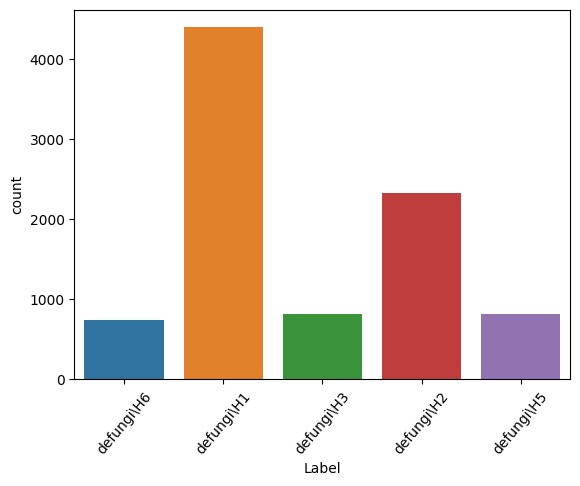

In [4]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [5]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [6]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

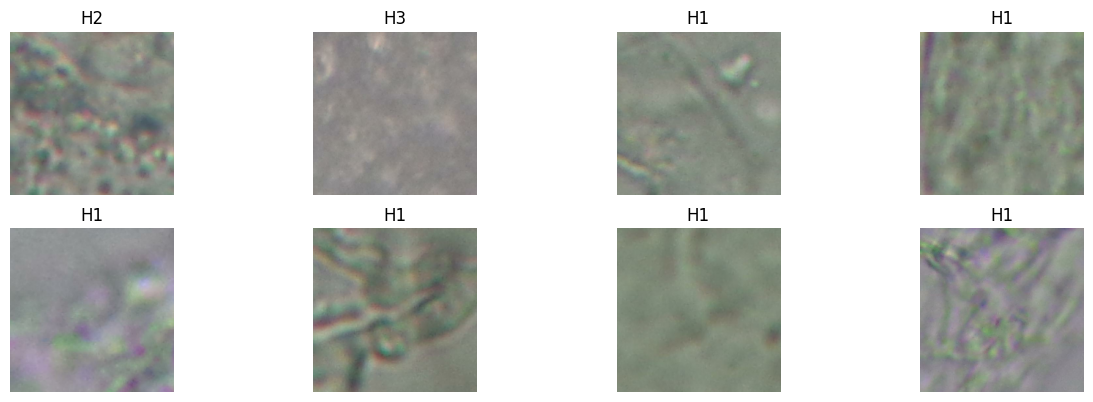

In [7]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
base_model = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


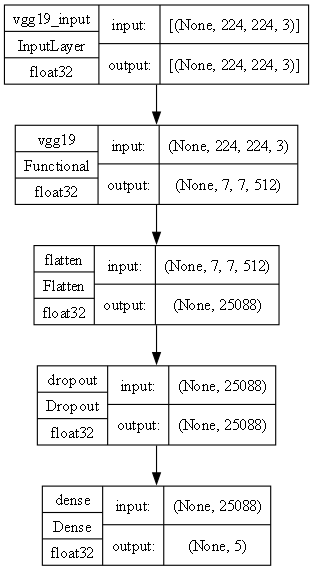

In [9]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [10]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [11]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [12]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
228/228 [==============================] - 1401s 6s/step - loss: 4.4056 - accuracy: 0.5709 - val_loss: 1.7928 - val_accuracy: 0.7558
Epoch 2/20
228/228 [==============================] - 1406s 6s/step - loss: 2.8622 - accuracy: 0.7010 - val_loss: 1.6621 - val_accuracy: 0.7942
Epoch 3/20
228/228 [==============================] - 1402s 6s/step - loss: 2.3280 - accuracy: 0.7534 - val_loss: 1.0780 - val_accuracy: 0.8342
Epoch 4/20
228/228 [==============================] - 1446s 6s/step - loss: 2.1216 - accuracy: 0.7729 - val_loss: 1.0963 - val_accuracy: 0.8535
Epoch 5/20
228/228 [==============================] - 1498s 7s/step - loss: 2.1154 - accuracy: 0.7848 - val_loss: 1.2507 - val_accuracy: 0.8677
Epoch 6/20
228/228 [==============================] - 1482s 7s/step - loss: 1.9353 - accuracy: 0.8039 - val_loss: 1.4759 - val_accuracy: 0.8101
Epoch 7/20
228/228 [==============================] - 1526s 7s/step - loss: 1.8544 - accuracy: 0.8129 - val_loss: 1.0267 - val_accuracy:

In [14]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 622s 11s/step - loss: 1.0267 - accuracy: 0.8754
Test Loss = 1.0266517400741577
Test Accuracy = 0.8754116296768188


In [15]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,4.405648,0.570900,1.792806,0.755763
1,2.862181,0.701042,1.662139,0.794182
2,2.327955,0.753428,1.078020,0.834248
3,2.121592,0.772902,1.096321,0.853458
4,2.115428,0.784833,1.250708,0.867728
5,1.935323,0.803895,1.475909,0.810099
6,1.854417,0.812946,1.026652,0.875412
7,1.693817,0.822271,1.172005,0.867179
8,1.766776,0.828031,1.078149,0.883644
9,1.947434,0.827619,1.247330,0.890231


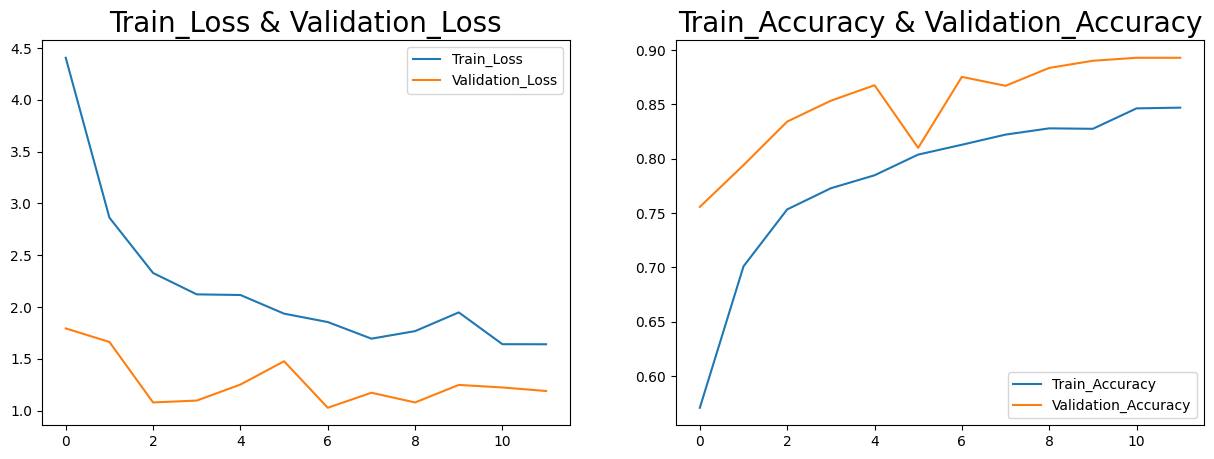

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [17]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 400s 7s/step


,Actual,Prediction
0,3,3
1,1,1
2,0,0
3,0,0
4,2,2
...,...,...
1817,2,2
1818,2,2
1819,1,1
1820,0,0


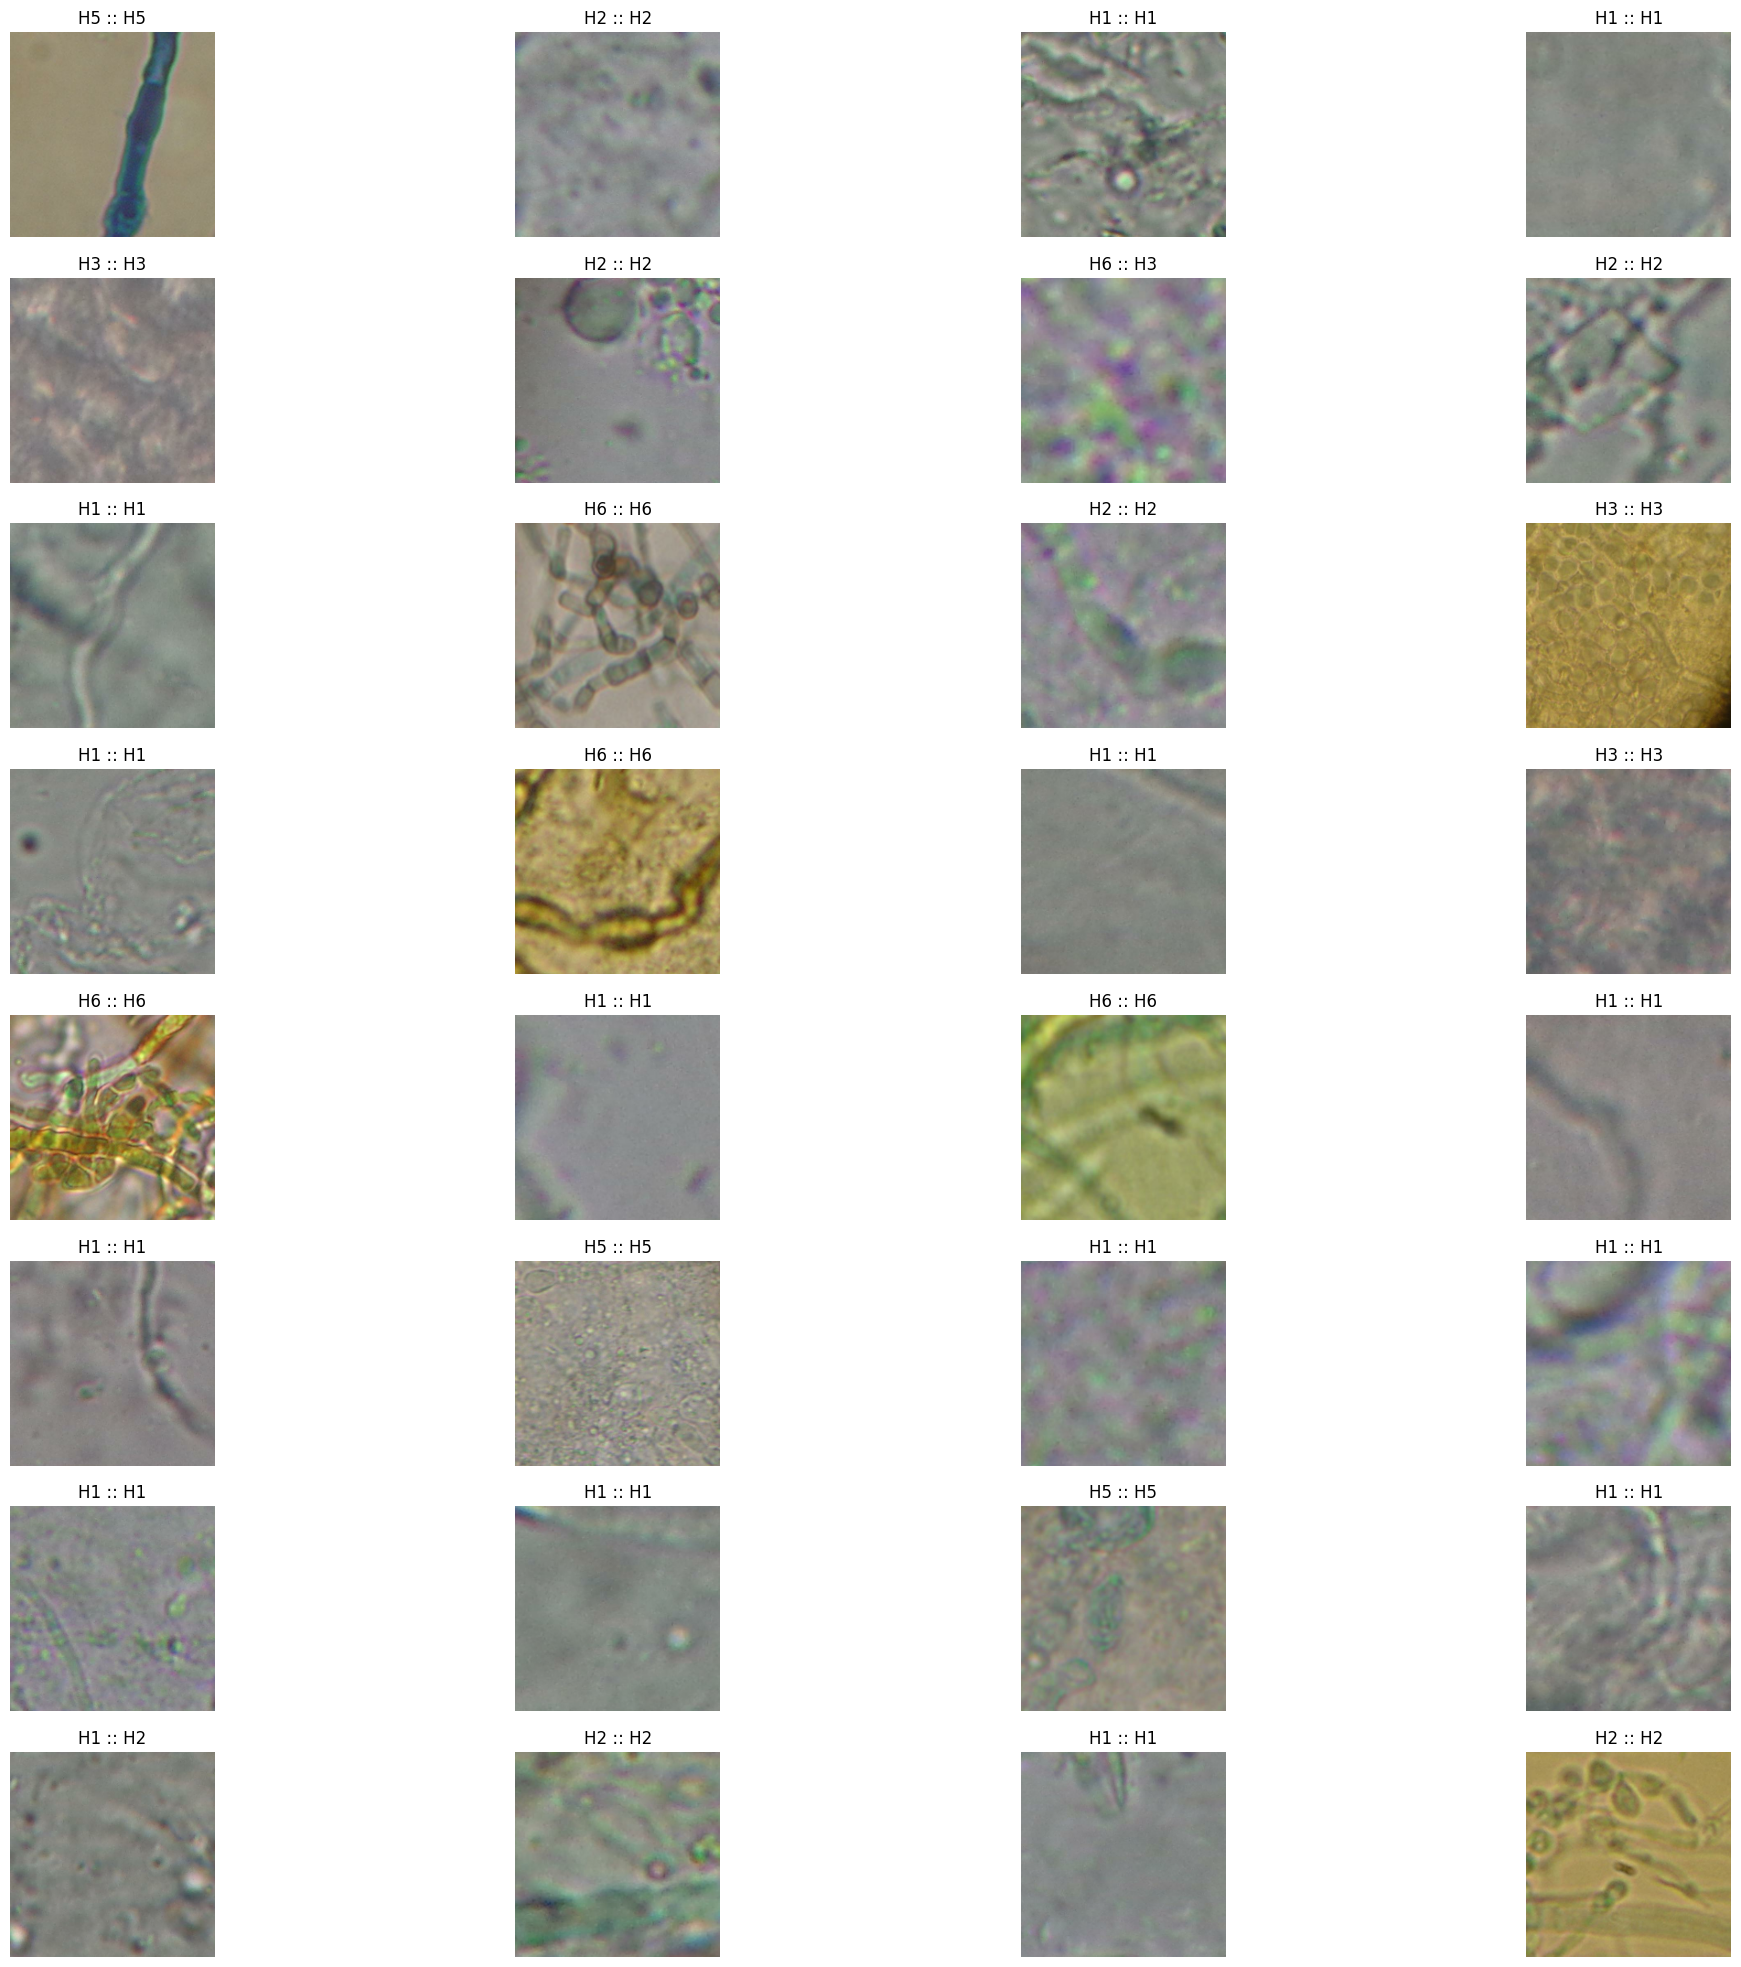

In [18]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")